<a class="anchor" id="udacity_toc"></a>
# Project: Investigate a Dataset - Neighborhood Health Care Habits

## Table of Contents

* [Table of Contents](#toc)
    * [Page 1 - Introduction](#udacity_page_1)
    * [Page 2 - Data Wrangling](#udacity_page_2)
    * [Page 3 - Data Cleaning](#udacity_page_3)
    * [Page 4 - Exploratory Data Analysis ](#udacity_page_4)
    * [Page 4a - Logistic Regression](#udacity_page_5)
    * [Page 5 - Research Question 2](#udacity_page_5)
    * [Page 6 - Research Question 3](#udacity_page_6)
    * [Page 7 - Conclusions](#udacity_page_7)
    * [Page 8 - Additional Visualizations](#udacity_page_8)


<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 1 - Introduction <a class="anchor" id="udacity_page_1"></a>

[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">


### Dataset Description 

This dataset collects information from more than 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
This analysis explores factors influencing no-shows for medical appointments using the data. The goal of this analysis is to uncover patterns and insights that might explain why patients miss appointments and to identify areas for potential intervention.The dependent variable is no_show, indicating whether a patient missed their scheduled appointment (Yes = did not show up, No = showed up).

We examine several independent variables, including:

 __Data columns:__
* patientid: The identification of a patient
* AppointmentID: The identification of each appointment
* gender: The gender of the patient Female (F) or Male (M)
* ScheduledDay: The day someone called or registered the appointment
* AppointmentDay: The day of the actual appointment
* age: The age of the patient
* neighbourhood: The neighbourhood in which the appointment takes place
* scholarship: True (1) or False (0) and it indicates whether or not the patient is enrolled in Brazilian welfare program
* hypertension: True (1) or False (0)
* diabetes: True (1) or False (0)
* alcoholism: True (1) or False (0)
* Handcap: Levels 0-4 
* sms_received: True (1) or False (0)
* no_show: The status of the appointment, ‘No’ indicates that the patient showed up to their appointment, while ‘Yes’ indicates that they did not show up and yes, they were a no-show.


[Return to Top](#top)

In [69]:
# import statements for all of the packages that will be used. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 2 - Data Wrangling <a class="anchor" id="udacity_page_2"></a>

> In this section of the report, I will load in the cleaned data, take a preliminary look, check for cleanliness, and further process for machine learning.
> 
[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

In [3]:
cleaned_df = pd.read_csv("cleaned_appointments.csv")

In [4]:
cleaned_df.head()

patient_id  appointment_id              scheduled_day  \
0   95985133231274         5626772  2016-04-27 08:36:51+00:00   
1  733688164476661         5630279  2016-04-27 15:05:12+00:00   
2    3449833394123         5630575  2016-04-27 15:39:58+00:00   
3   78124564369297         5629123  2016-04-27 12:48:25+00:00   
4  734536231958495         5630213  2016-04-27 14:58:11+00:00   

             appointment_day  age   neighbourhood  scholarship  hypertension  \
0  2016-04-29 00:00:00+00:00   76       REPÚBLICA            0             1   
1  2016-04-29 00:00:00+00:00   23      GOIABEIRAS            0             0   
2  2016-04-29 00:00:00+00:00   39      GOIABEIRAS            0             0   
3  2016-04-29 00:00:00+00:00   19       CONQUISTA            0             0   
4  2016-04-29 00:00:00+00:00   30  NOVA PALESTINA            0             0   

   diabetes  alcoholism  handicap  sms_received  no_show  waiting_time  \
0         0           0         0             0        0             1   
1         0           0         0             0        1             1   
2         0           0         0             0        1             1   
3         0           0         0             0        0             1   
4         0           0         0             0        0             1   

   gender_M  
0         0  
1         0  
2         0  
3         0  
4         0

In [5]:
cleaned_df['handicap'].value_counts()

handicap
0    70651
1     1182
2      112
3        8
4        2
Name: count, dtype: int64

In [6]:
cleaned_df.isnull().sum() #check for null values

patient_id         0
appointment_id     0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
waiting_time       0
gender_M           0
dtype: int64

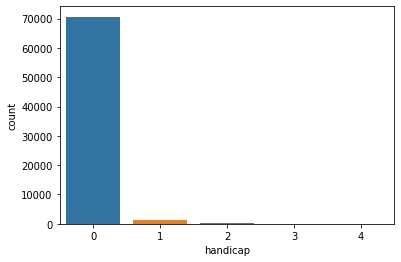

In [7]:
sns.countplot(x='handicap', data=cleaned_df)
plt.show()

In [8]:
cleaned_df.describe(include='object')  # Categorical columns and their summary statistics

scheduled_day            appointment_day   neighbourhood
count                       71955                      71955           71955
unique                      68663                         27              80
top     2016-04-25 17:17:46+00:00  2016-06-06 00:00:00+00:00  JARDIM CAMBURI
freq                           22                       3073            5213

In [10]:
cleaned_df.shape 

(71955, 15)

From the preceding cells we get a sense of how big our dataset is (71,955 rows and 15 columns)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 3 - Data Cleaning <a class="anchor" id="udacity_page_3"></a>

#### Cleaning the rest of the data 
> bin ages into categories and convert to numeric value
> 
> check for outliers with waiting time
>
> recode neighbourhood
[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

In [11]:
cleaned_df.tail()

patient_id  appointment_id              scheduled_day  \
71950    2572134369293         5651768  2016-05-03 09:15:35+00:00   
71951    3596266328735         5650093  2016-05-03 07:27:33+00:00   
71952   15576631729893         5630692  2016-04-27 16:03:52+00:00   
71953   92134931435557         5630323  2016-04-27 15:09:23+00:00   
71954  377511518121127         5629448  2016-04-27 13:30:56+00:00   

                 appointment_day  age neighbourhood  scholarship  \
71950  2016-06-07 00:00:00+00:00   56   MARIA ORTIZ            0   
71951  2016-06-07 00:00:00+00:00   51   MARIA ORTIZ            0   
71952  2016-06-07 00:00:00+00:00   21   MARIA ORTIZ            0   
71953  2016-06-07 00:00:00+00:00   38   MARIA ORTIZ            0   
71954  2016-06-07 00:00:00+00:00   54   MARIA ORTIZ            0   

       hypertension  diabetes  alcoholism  handicap  sms_received  no_show  \
71950             0         0           0         0             1        0   
71951             0         0           0         0             1        0   
71952             0         0           0         0             1        0   
71953             0         0           0         0             1        0   
71954             0         0           0         0             1        0   

       waiting_time  gender_M  
71950            34         0  
71951            34         0  
71952            40         0  
71953            40         0  
71954            40         0

In [12]:
round(cleaned_df['age'].mean(),2)

38.5

In [13]:
#bin ages into categories 
cleaned_df['age_group'] = pd.cut(cleaned_df['age'], bins=[0, 17, 40, 65, 100], labels=['child', 'young_adult', 'adult', 'senior'])


In [14]:
cleaned_df['age_group'].value_counts()

age_group
adult          24895
young_adult    21512
child          14035
senior          9381
Name: count, dtype: int64

In [15]:
print(cleaned_df['age_group'].unique())


['senior', 'young_adult', 'adult', 'child', NaN]
Categories (4, object): ['child' < 'young_adult' < 'adult' < 'senior']


In [16]:
print(cleaned_df['age_group'].value_counts())

age_group
adult          24895
young_adult    21512
child          14035
senior          9381
Name: count, dtype: int64


In [17]:
# Define mapping for age_group
age_group_mapping = {
    'child': 0,
    'young_adult': 1,
    'adult': 2,
    'senior': 3,
    np.nan: 4  # For unknown/missing values
}

# Apply the mapping to the "age_group" column
if 'age_group' in cleaned_df.columns:
    cleaned_df['age_group'] = cleaned_df['age_group'].map(age_group_mapping).fillna(4).astype(int)

# Print to verify values
print(cleaned_df['age_group'].value_counts())  # Should display counts for 0, 1, 2, 3, 4
print(cleaned_df['age_group'].unique())  # Should show [0, 1, 2, 3, 4]



age_group
2    24895
1    21512
0    14035
3     9381
4     2132
Name: count, dtype: int64
[3 1 2 0 4]


count    71955.000000
mean        38.498311
std         22.918962
min          0.000000
25%         19.000000
50%         39.000000
75%         57.000000
max        102.000000
Name: age, dtype: float64


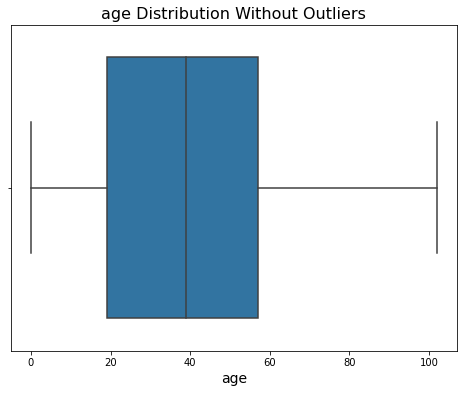

In [18]:
# Identify outliers using summary statistics
print(cleaned_df['age'].describe())

# Visualize outliers and filter out extreme outliers (already fixed)
cleaned_df = cleaned_df[cleaned_df['age'] <= 115]  # Ensure no extreme ages remain

# Plot the boxplot with the updated syntax
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=cleaned_df)  
plt.title('age Distribution Without Outliers', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.show()


In [19]:
#confirm age values
print(f"the maximum age is:",cleaned_df['age'].max())
print(cleaned_df['age'].min())

the maximum age is: 102
0


In [20]:
cleaned_df.info() #confirm data type changes and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71955 entries, 0 to 71954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       71955 non-null  int64 
 1   appointment_id   71955 non-null  int64 
 2   scheduled_day    71955 non-null  object
 3   appointment_day  71955 non-null  object
 4   age              71955 non-null  int64 
 5   neighbourhood    71955 non-null  object
 6   scholarship      71955 non-null  int64 
 7   hypertension     71955 non-null  int64 
 8   diabetes         71955 non-null  int64 
 9   alcoholism       71955 non-null  int64 
 10  handicap         71955 non-null  int64 
 11  sms_received     71955 non-null  int64 
 12  no_show          71955 non-null  int64 
 13  waiting_time     71955 non-null  int64 
 14  gender_M         71955 non-null  int64 
 15  age_group        71955 non-null  int32 
dtypes: int32(1), int64(12), object(3)
memory usage: 8.5+ MB


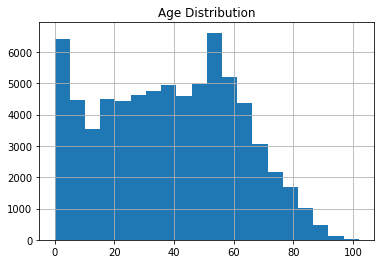

In [21]:
cleaned_df['age'].hist(bins=20)
plt.title("Age Distribution")
plt.show()

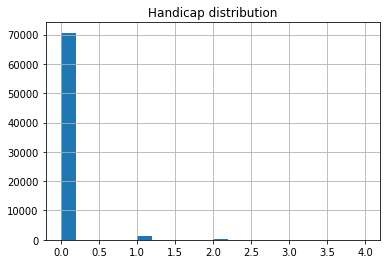

In [22]:
cleaned_df['handicap'].hist(bins=20)
plt.title("Handicap distribution")
plt.show()

<AxesSubplot:xlabel='handicap', ylabel='count'>

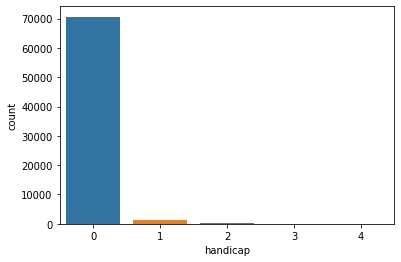

In [23]:
sns.countplot(x='handicap', data=cleaned_df)

Looks like the majority of handicap = 0.

In [24]:
#check the proportions of 'yes' and 'no' 
cleaned_df['no_show'].value_counts(normalize=True)


no_show
0    0.714836
1    0.285164
Name: proportion, dtype: float64

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 4 - Exploratory Data Analysis <a class="anchor" id="udacity_page_4"></a>

[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">


#### we examined the following:

> __Age Distribution:__ A histogram visualized age differences for those who showed up versus no-shows.<br>
> __Socioeconomic Factors:__ The impact of receiving a scholarship on no-show rates was evaluated through a bar plot.<br>
__SMS Notifications:__ We visualized the impact of sending SMS notifications.


__Findings:__

* Age: Age does not show a strong trend in predicting no-shows, with rates being fairly consistent across age groups.
  
* Scholarship: Patients on welfare (Scholarship = 1) have slightly higher no-show rates (23.7%) than those not on welfare (19.8%), suggesting socioeconomic status may play a role.
  
* SMS Notifications: Patients who received an SMS reminder had a higher no-show rate (27.6%) compared to those who did not (16.7%). This counterintuitive result warrants further investigation, as it may reflect bias in who received SMS notifications.

The lack of strong trends in the above variables suggests that other factors (e.g., neighborhood or chronic conditions) may play a more significant role in predicting no-shows. A logistic regression model could be helpful for evaluating combined effects of variables.

[Return to Top](#top)

### Taking a look at the data


> Now that we have a clean dataset, I'm going to start to get to know the patients in this dataset. I'll start by looking at where they live, and how many patients are listed as such in the different neighborhoods.

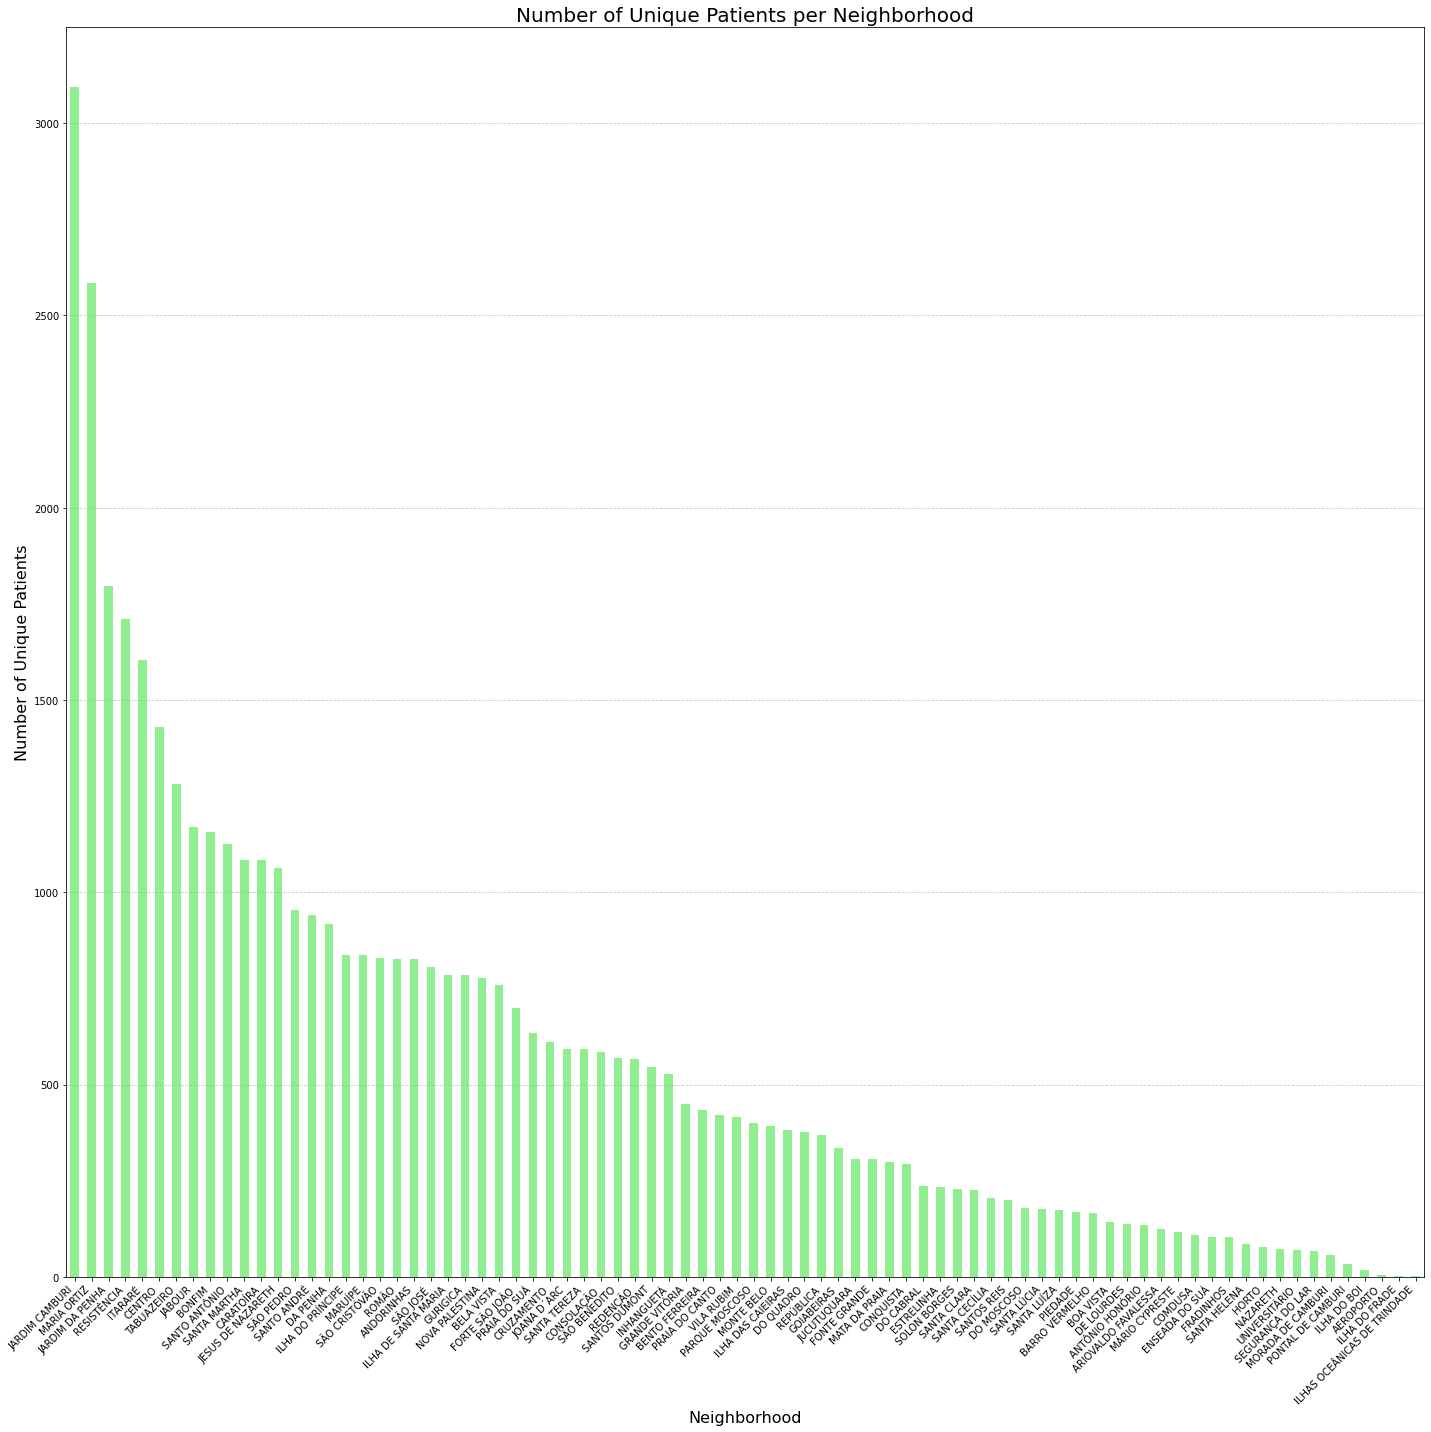

In [25]:
# Count of unique patientids per neighborhood
unique_patients_per_neighborhood = cleaned_df.groupby('neighbourhood')['patient_id'].nunique().sort_values(ascending=False)
# Plot a bar chart with refined x-axis labels for better readability
plt.figure(figsize=(20, 20))
unique_patients_per_neighborhood.plot(kind='bar', color='lightgreen')
plt.title('Number of Unique Patients per Neighborhood', fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.ylabel('Number of Unique Patients', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # to ensure everything fits nicely within the plot area
plt.show()

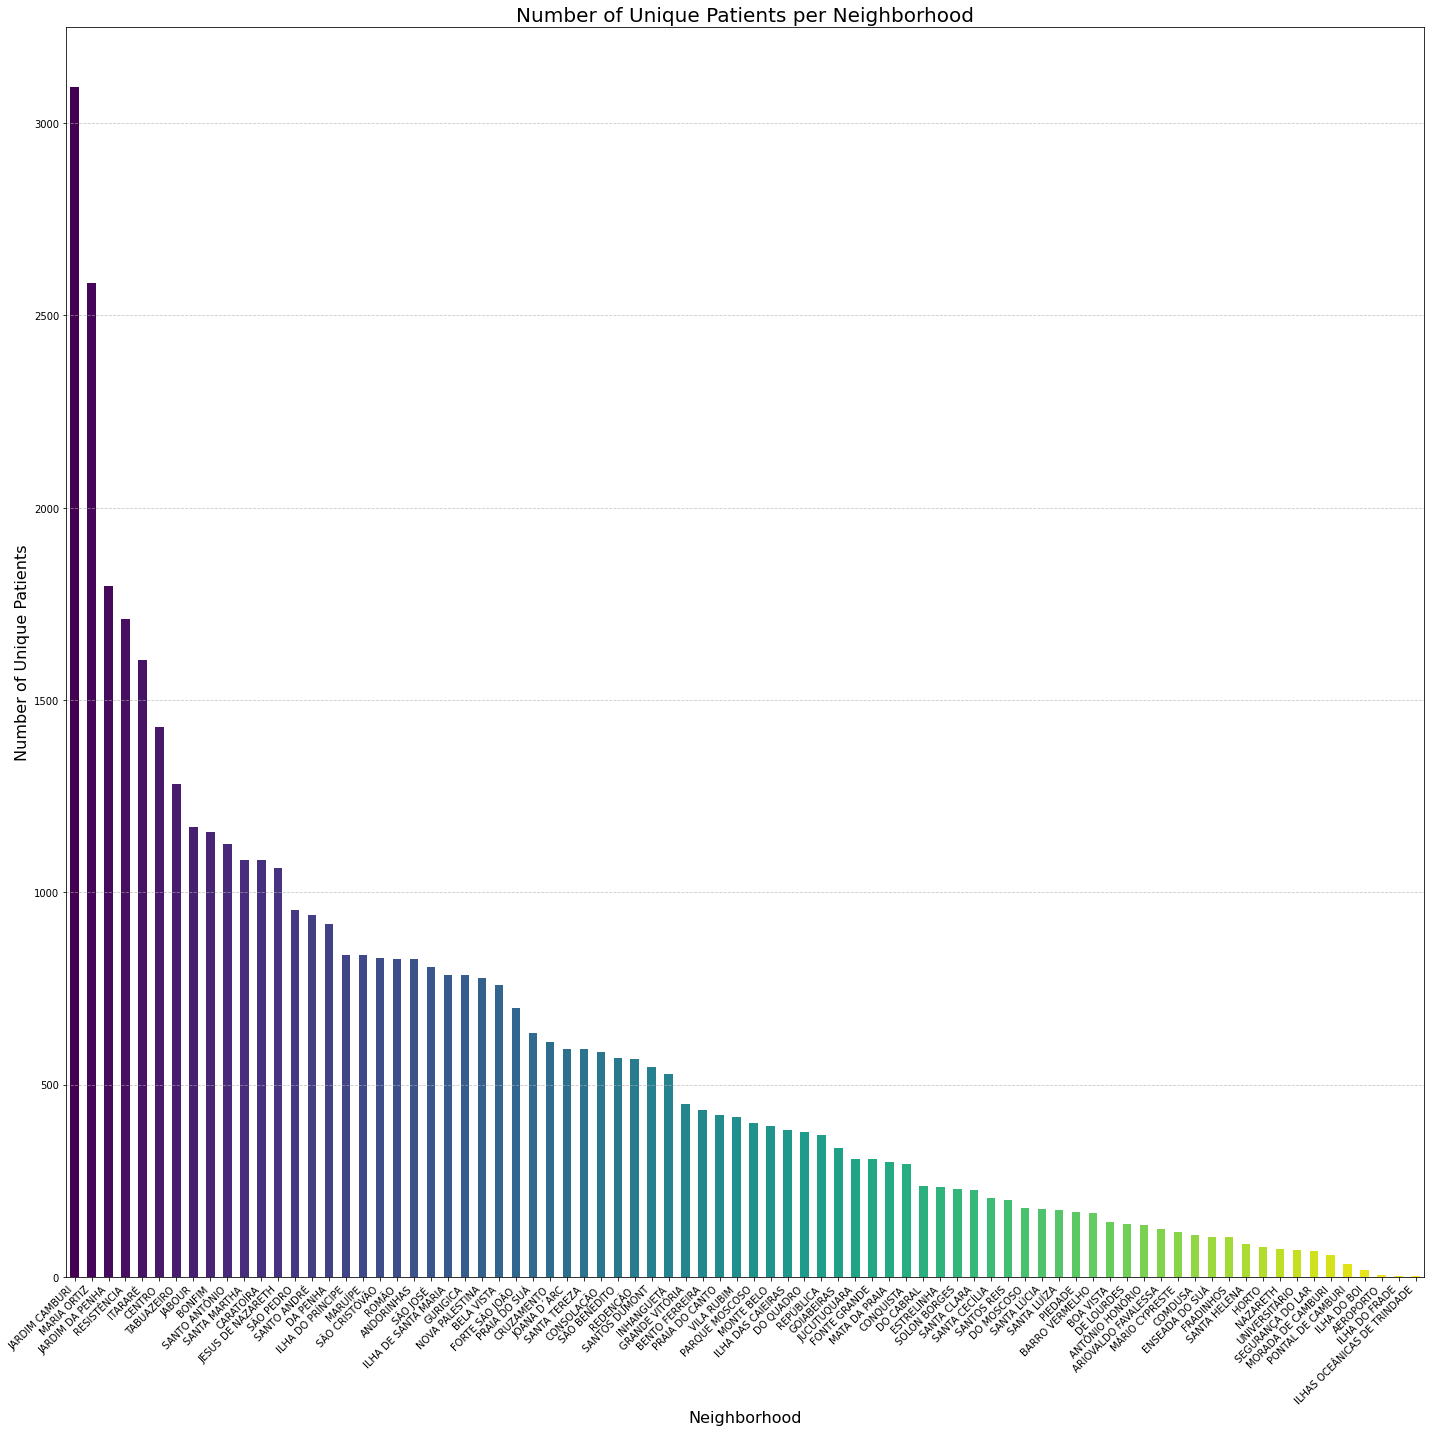

In [26]:
# Generate a gradient color map
colors = cm.viridis(np.linspace(0, 1, len(unique_patients_per_neighborhood)))

plt.figure(figsize=(20, 20))
unique_patients_per_neighborhood.plot(
    kind='bar', 
    color=colors
)
plt.title('Number of Unique Patients per Neighborhood', fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.ylabel('Number of Unique Patients', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

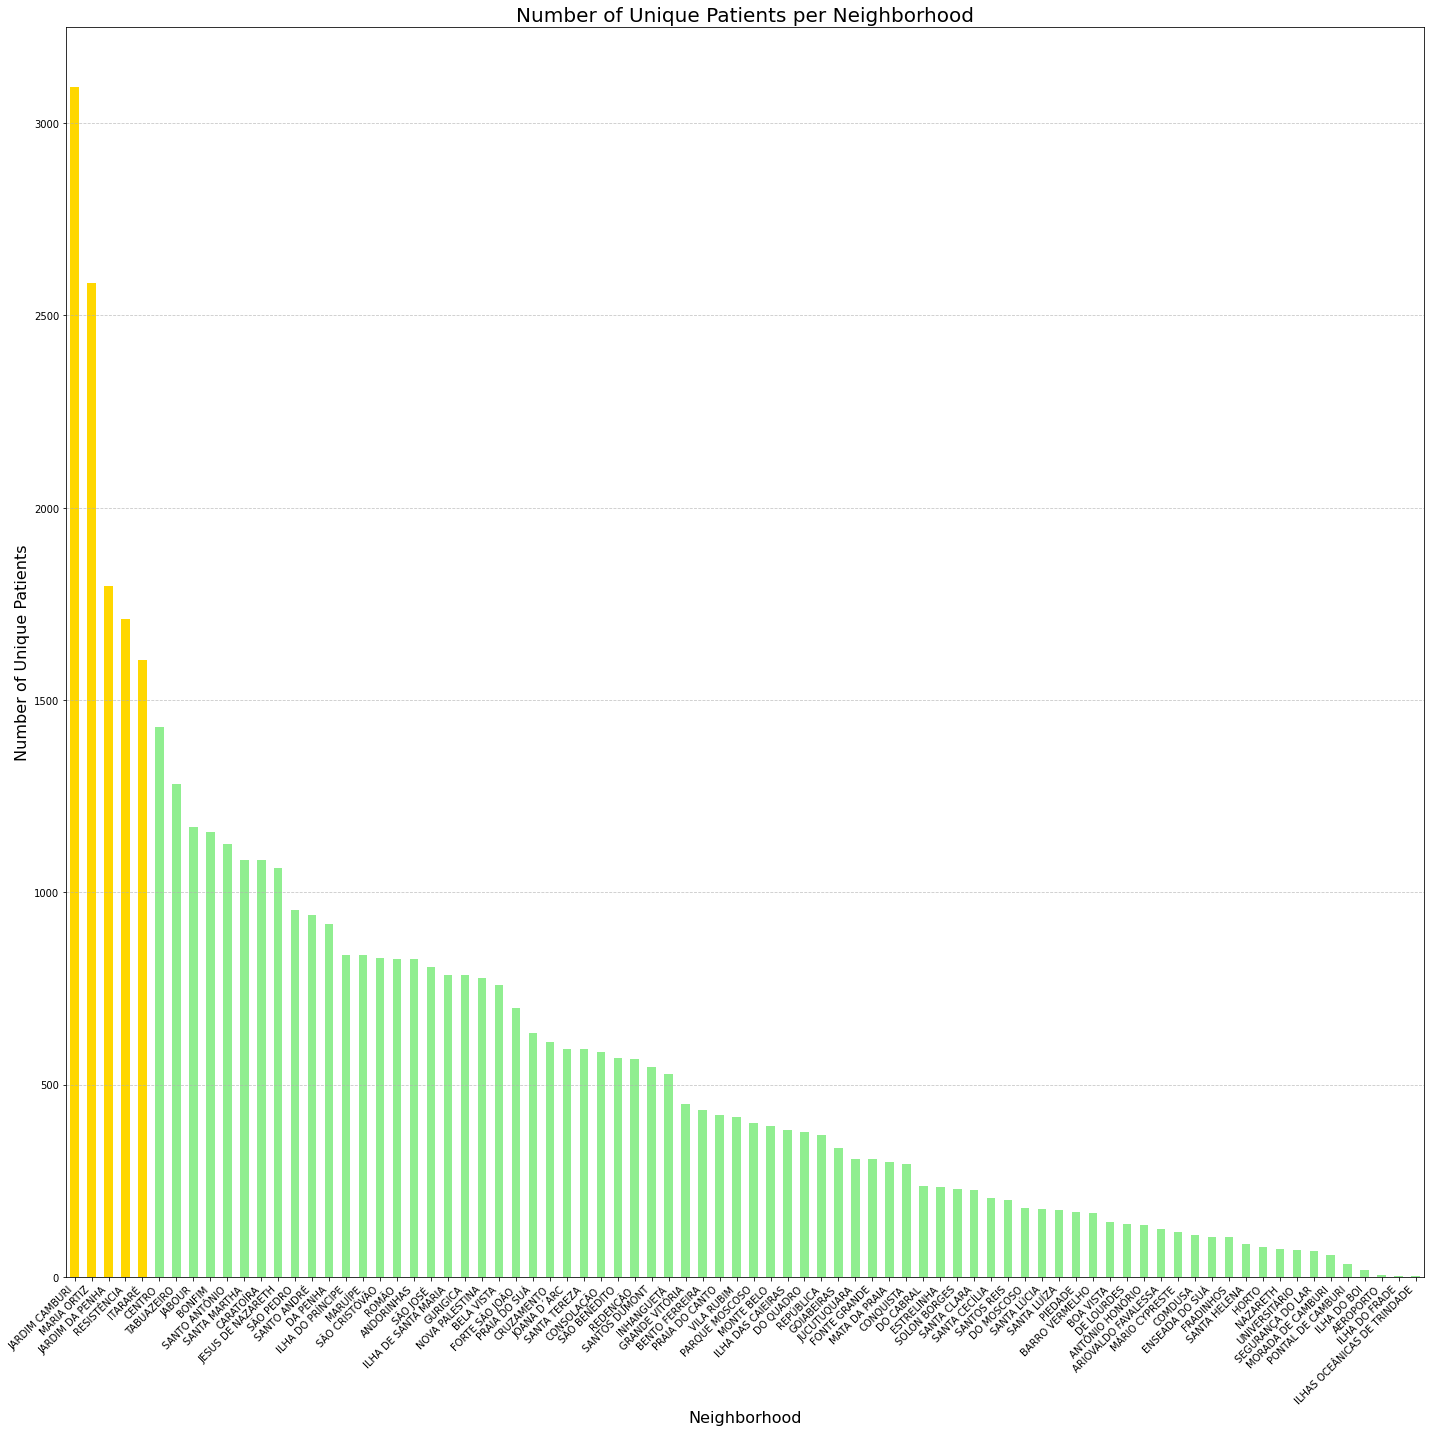

In [27]:
# Highlight top 5 neighborhoods
top_n = 5
colors = ['gold' if i < top_n else 'lightgreen' for i in range(len(unique_patients_per_neighborhood))]

plt.figure(figsize=(20, 20))
unique_patients_per_neighborhood.plot(
    kind='bar', 
    color=colors
)
plt.title('Number of Unique Patients per Neighborhood', fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.ylabel('Number of Unique Patients', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
df_with_dummies = pd.get_dummies(cleaned_df, columns=['neighbourhood'], drop_first=True)


In [29]:
df_with_dummies.head()

patient_id  appointment_id              scheduled_day  \
0   95985133231274         5626772  2016-04-27 08:36:51+00:00   
1  733688164476661         5630279  2016-04-27 15:05:12+00:00   
2    3449833394123         5630575  2016-04-27 15:39:58+00:00   
3   78124564369297         5629123  2016-04-27 12:48:25+00:00   
4  734536231958495         5630213  2016-04-27 14:58:11+00:00   

             appointment_day  age  scholarship  hypertension  diabetes  \
0  2016-04-29 00:00:00+00:00   76            0             1         0   
1  2016-04-29 00:00:00+00:00   23            0             0         0   
2  2016-04-29 00:00:00+00:00   39            0             0         0   
3  2016-04-29 00:00:00+00:00   19            0             0         0   
4  2016-04-29 00:00:00+00:00   30            0             0         0   

   alcoholism  handicap  ...  neighbourhood_SANTOS REIS  \
0           0         0  ...                      False   
1           0         0  ...                      False   
2           0         0  ...                      False   
3           0         0  ...                      False   
4           0         0  ...                      False   

   neighbourhood_SEGURANÇA DO LAR  neighbourhood_SOLON BORGES  \
0                           False                       False   
1                           False                       False   
2                           False                       False   
3                           False                       False   
4                           False                       False   

   neighbourhood_SÃO BENEDITO  neighbourhood_SÃO CRISTÓVÃO  \
0                       False                        False   
1                       False                        False   
2                       False                        False   
3                       False                        False   
4                       False                        False   

   neighbourhood_SÃO JOSÉ  neighbourhood_SÃO PEDRO  neighbourhood_TABUAZEIRO  \
0                   False                    False                     False   
1                   False                    False                     False   
2                   False                    False                     False   
3                   False                    False                     False   
4                   False                    False                     False   

   neighbourhood_UNIVERSITÁRIO  neighbourhood_VILA RUBIM  
0                        False                     False  
1                        False                     False  
2                        False                     False  
3                        False                     False  
4                        False                     False  

[5 rows x 94 columns]

In [30]:
# Convert columns to datetime if not already
df_with_dummies['scheduled_day'] = pd.to_datetime(df_with_dummies['scheduled_day'], errors='coerce')
df_with_dummies['appointment_day'] = pd.to_datetime(df_with_dummies['appointment_day'], errors='coerce')

# Convert non-datetime columns to int
columns_to_convert = df_with_dummies.select_dtypes(include=['bool', 'int', 'float']).columns
df_with_dummies[columns_to_convert] = df_with_dummies[columns_to_convert].astype(int)

# Convert datetime to days since the first appointment
df_with_dummies['days_since_scheduled'] = (df_with_dummies['scheduled_day'] - df_with_dummies['scheduled_day'].min()).dt.days
df_with_dummies['days_until_appointment'] = (df_with_dummies['appointment_day'] - df_with_dummies['scheduled_day']).dt.days

# Drop original datetime columns
df_with_dummies = df_with_dummies.drop(columns=['scheduled_day', 'appointment_day'])


In [31]:
print(df_with_dummies.dtypes)


patient_id                     int32
appointment_id                 int32
age                            int32
scholarship                    int32
hypertension                   int32
                               ...  
neighbourhood_TABUAZEIRO       int32
neighbourhood_UNIVERSITÁRIO    int32
neighbourhood_VILA RUBIM       int32
days_since_scheduled           int64
days_until_appointment         int64
Length: 94, dtype: object


In [32]:
# Fill NaNs for specific columns
df_with_dummies['days_since_scheduled'] = df_with_dummies['days_since_scheduled'].fillna(df_with_dummies['days_since_scheduled'].median())
df_with_dummies['days_until_appointment'] = df_with_dummies['days_until_appointment'].fillna(0)  

# Convert columns
columns_to_convert = df_with_dummies.select_dtypes(include=['float', 'int']).columns
df_with_dummies[columns_to_convert] = df_with_dummies[columns_to_convert].astype(int)


In [33]:
df_with_dummies = df_with_dummies.fillna(0) #any remaining NaNs


In [35]:
# Convert all non-datetime columns to integers
columns_to_convert = df_with_dummies.select_dtypes(include=['float', 'int', 'object']).columns
df_with_dummies[columns_to_convert] = df_with_dummies[columns_to_convert].astype(int)

print("All columns converted to integers successfully!")

All columns converted to integers successfully!


In [37]:
#checking for any other categorical values
non_numeric_cols = df_with_dummies.select_dtypes(include=['object', 'category']).columns
print(f"Non-numeric columns: {non_numeric_cols}")


Non-numeric columns: Index([], dtype='object')


### Who are our patients? How old are they, how many are there?

In [41]:
df_with_dummies['patient_id'].nunique() # number of unique patients - there are 45,838 unique patient IDs

45838

In [40]:
# Group by no_show and calculate average age
age_analysis = df_with_dummies.groupby('no_show')['age'].describe()
print(age_analysis)


           count       mean        std  min   25%   50%   75%    max
no_show                                                             
0        51436.0  39.964247  23.137906  0.0  21.0  41.0  58.0  102.0
1        20519.0  34.823578  21.934776  0.0  17.0  33.0  51.0   98.0


> The majority of patients are between the ages of 0 and 60. While younger children (ages 0-10) seem to have a high representation in appointments, their no-show rates remain relatively proportional to their presence.

> Among patients who showed up (51,436 appointments), the mean age is approximately **40 years** with a standard deviation of **23.14 years**, ranging from **0 to 102 years**. In contrast, for no-show patients (20,519 appointments), the mean age is approximately **35 years** with a standard deviation of **21.93 years**, ranging from **0 to 98 years**.

> There doesn't appear to be a strong correlation between age and no-show rates. However, younger children (ages 0-10) and older adults may show slightly higher variability due to factors like reliance on caregivers to attend appointments.

> Age alone doesn't appear to be a significant predictor of no-show behavior. Additional context, such as transportation and socioeconomic factors, may be needed to draw more meaningful conclusions for specific age groups.


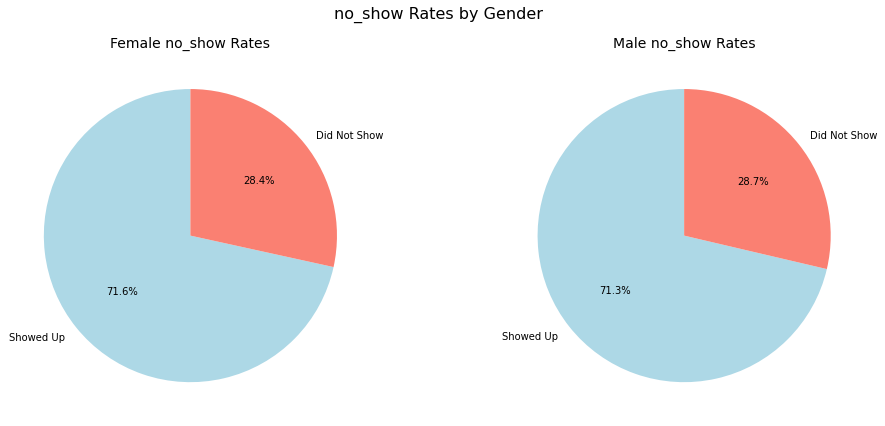

In [42]:
# Group data by gender (0 for female, 1 for male) and no_show, count occurrences
gender_no_show_counts = df_with_dummies.groupby(['gender_M', 'no_show']).size().unstack()

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot pie chart for females (gender_M == 0)
axes[0].pie(
    gender_no_show_counts.loc[0],  # 0 = female
    labels=['Showed Up', 'Did Not Show'],
    autopct='%1.1f%%',
    colors=['lightblue', 'salmon'],
    startangle=90
)
axes[0].set_title('Female no_show Rates', fontsize=14)

# Plot pie chart for males (gender_M == 1)
axes[1].pie(
    gender_no_show_counts.loc[1],  # 1 = male
    labels=['Showed Up', 'Did Not Show'],
    autopct='%1.1f%%',
    colors=['lightblue', 'salmon'],
    startangle=90
)
axes[1].set_title('Male no_show Rates', fontsize=14)

plt.suptitle('no_show Rates by Gender', fontsize=16)
plt.tight_layout()
plt.show()


> These pie charts illustrate the no-show rates for male and female patients. The no-show rates are nearly identical, with **males** having a no-show rate of **28.7%** and **females** having a rate of **28.4%**. This similarity suggests that **gender** is not a significant factor influencing appointment attendance.

> Both groups show attendance rates around **71%**, reinforcing that other variables—such as **age**, **socioeconomic status**, or **neighborhood**—may be more influential in predicting no-show behavior.

> Future analyses could incorporate these additional variables to better understand the underlying factors driving no-show rates in the dataset.
younger patients show a higher likelihood of attending appointments regardless of gender.


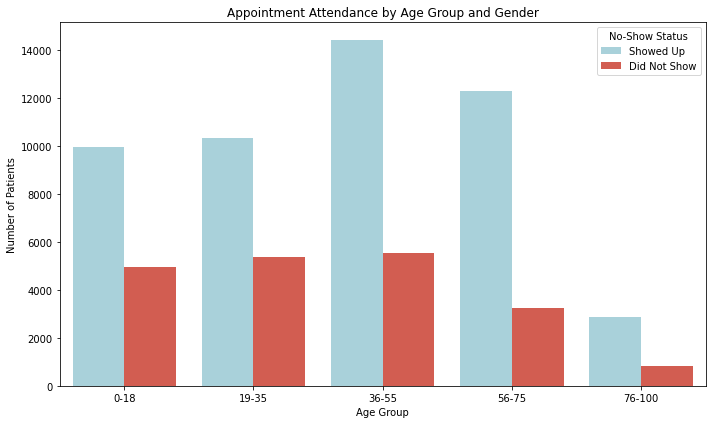

In [45]:
# Create age bins for better visualization
df_with_dummies['age_group'] = pd.cut(df_with_dummies['age'], bins=[0, 18, 35, 55, 75, 100], labels=['0-18', '19-35', '36-55', '56-75', '76-100'])

# Plotting grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_with_dummies, x='age_group', hue='no_show', palette=['#a1d6e2', '#e74c3c'], hue_order=[0, 1])
plt.title("Appointment Attendance by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.legend(title='No-Show Status', labels=['Showed Up', 'Did Not Show'])

# Show grouped bar chart
plt.tight_layout()
plt.show()


The bar chart shows how appointment attendance varies across age groups. The light blue bars represent patients who showed up, while the salmon bars represent those who did not.

With younger patients (ages 0-18) there is a relatively high number of patients who showed up for their appointments compared to those who did not. However, the no-show rate remains noticeable within this group.
For middle-aged patients (19-35 and 36-55), these age groups exhibit the highest counts of attendees, with a corresponding increase in no-show counts as well. However, the proportion of no-shows relative to attendees appears consistent.
Older adults (56-75 and 76-100): The number of attendees starts to decline, but the no-show rate remains steady, particularly for patients aged 56-75.

The overlap between "Showed Up" and "Did Not Show" suggests that age, rather than gender, may have a stronger influence on attendance.
The most noticeable trend is that younger patients, particularly those aged 0-18, are more likely to show up compared to older groups.
Despite the differences across age groups, the no-show rate remains fairly proportional, with no sharp spikes or outliers indicating an age-based attendance drop-off.
This visual reinforces that age appears to be a more significant factor in predicting attendance than gender alone.

#### Analyzing the effect of scholarships

no_show          0      1  no_show Rate (%)
scholarship                                
0            47098  18186         27.856749
1             4338   2333         34.972268


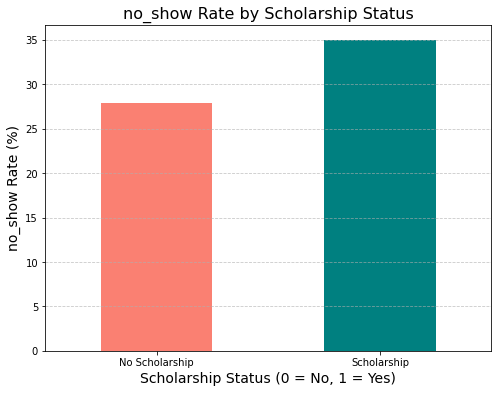

In [43]:
# Calculate no_show rate by scholarship status
scholarship_analysis = df_with_dummies.groupby(['scholarship', 'no_show']).size().unstack()
scholarship_analysis['no_show Rate (%)'] = (scholarship_analysis[1] / scholarship_analysis.sum(axis=1)) * 100  # 1 represents "did not show up"
print(scholarship_analysis)

# Bar chart to visualize
plt.figure(figsize=(8, 6))
scholarship_analysis['no_show Rate (%)'].plot(kind='bar', color=['salmon', 'teal'])
plt.title('no_show Rate by Scholarship Status', fontsize=16)
plt.xlabel('Scholarship Status (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('no_show Rate (%)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Scholarship', 'Scholarship'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



> The bar chart illustrates the no-show rates for patients based on their scholarship enrollment status, where "0" represents patients not enrolled in the scholarship program and "1" represents enrolled patients.

| Scholarship Status | Showed Up | Did Not Show | No-Show Rate (%) |
|--------------------|-----------|--------------|-----------------|
| No Scholarship (0) | 47,098    | 18,186       | 27.9%           |
| Scholarship (1)    | 4,338     | 2,333        | 35.0%           |



> Patients enrolled in the scholarship program, which may indicate lower-income status, have a higher no-show rate compared to non-enrolled patients (35.0% vs. 27.9%).
This difference suggests that socioeconomic factors, such as transportation issues or scheduling conflicts, may play a role in appointment attendance. However, the gap is not drastically large, implying that additional factors likely contribute to this trend.
Insights:
The higher no-show rate for scholarship-enrolled patients may highlight potential systemic challenges, such as accessibility or appointment reminders not addressing root causes of missed appointments.
> Further investigation could explore whether scholarship patients face unique barriers, such as limited transportation options or scheduling inflexibility.
> 
The data also raises questions about the role of SMS reminders, as higher no-show rates could suggest unintended effects, such as reminder fatigue or selection bias where reminder recipients differ systematically from non-recipients.

#### Analyzing the effect of sending text messages (sms_received)

no_show           0      1  no_show Rate (%)
sms_received                                
0             25739  10735         29.431924
1             25697   9784         27.575322


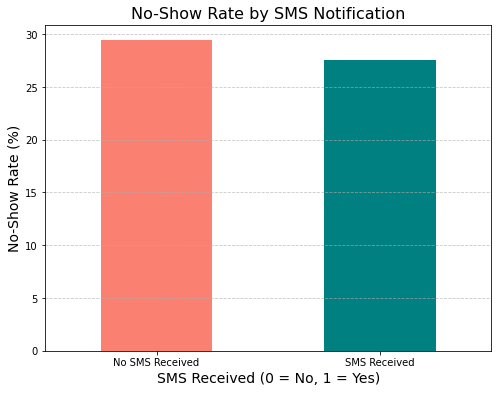

In [46]:
# Calculate no_show rate by sms_received
sms_analysis = df_with_dummies.groupby(['sms_received', 'no_show']).size().unstack()
sms_analysis['no_show Rate (%)'] = (sms_analysis[1] / sms_analysis.sum(axis=1)) * 100  # 1 represents "did not show up"
print(sms_analysis)

# Bar chart to visualize
plt.figure(figsize=(8, 6))
sms_analysis['no_show Rate (%)'].plot(kind='bar', color=['salmon', 'teal'])
plt.title('No-Show Rate by SMS Notification', fontsize=16)
plt.xlabel('SMS Received (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('No-Show Rate (%)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No SMS Received', 'SMS Received'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> The bar chart shows the no-show rates for patients based on whether they received an SMS reminder.


| SMS Notification | Showed Up | Did Not Show | No-Show Rate (%) |
|------------------|-----------|--------------|-----------------|
| No SMS Received (0) | 25,739    | 10,735       | 29.4%           |
| SMS Received (1)    | 25,697    | 9,784        | 27.6%           |


Suprising and contrary to expectations, patients who received SMS reminders had a slightly lower no-show rate (27.6%) compared to those who did not receive reminders (29.4%).
The difference, while small, suggests that SMS reminders may have some positive effect in encouraging attendance.

The data here does not support the hypothesis that SMS reminders increase no-show rates. Instead, the slight improvement in attendance rates may indicate that reminders help some patients but may not address underlying issues such as transportation or scheduling conflicts.
Further investigation could explore whether SMS reminders have a stronger effect in certain subgroups (e.g., age or neighborhood) or whether additional types of reminders (e.g., phone calls) could complement SMS messages to further reduce no-show rates.







In [47]:
# Group by age and count the number of patients for each age
age_counts = df_with_dummies.groupby('age')['patient_id'].count().reset_index()

# Rename columns for better readability
age_counts.columns = ['Age', 'Patient Count']

# Sort the DataFrame by age
age_counts = age_counts.sort_values(by='Age', ascending=True)

# Display the result
print(age_counts)


     Age  Patient Count
0      0           2131
1      1           1084
2      2            717
3      3            809
4      4            750
..   ...            ...
96    96              5
97    97              6
98    98              5
99   100              4
100  102              1

[101 rows x 2 columns]


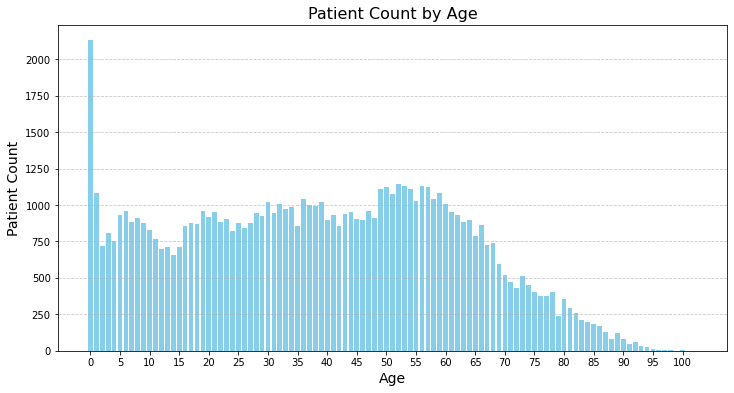

In [48]:
# Plot the age distribution
plt.figure(figsize=(12, 6))
plt.bar(age_counts['Age'], age_counts['Patient Count'], color='skyblue')
plt.title('Patient Count by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Patient Count', fontsize=14)
plt.xticks(ticks=range(0, age_counts['Age'].max() + 1, 5))  # Optional: show x-axis labels in increments of 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> The highest bar at age 0 indicates that a significant number of patients in the dataset are infants (likely newborns or toddlers under 1 year old). This suggests that pediatric appointments for very young children are highly frequent.
>
> The distribution shows a gradual decline from ages 1 to around 10, followed by a relatively consistent number of appointments between the ages of 20 and 50. This indicates a broad, stable representation of working-age adults.
>
> After age 50, the number of patients gradually decreases, indicating fewer appointments as age increases. This may reflect either fewer elderly individuals in the dataset or less frequent visits by older age groups.
>
> The right side of the distribution shows a tapering for patients in their 70s, 80s, and 90s, indicating that appointments for very elderly patients are less common but still present.

#### Key Takeaways:
- The dataset has a large representation of pediatric patients (age 0).
- There is a broad, stable distribution for working-age adults (20–50).
- The decline for older patients aligns with expected population demographics.

> Next, by breaking ages into 5-year ranges, patterns might become even clearer and highlight more nuanced trends.


   Age Range  Patient Count
0        0-4           5491
1        5-9           4567
2      10-14           3663
3      15-19           4274
4      20-24           4480
5      25-29           4467
6      30-34           4934
7      35-39           4908
8      40-44           4569
9      45-49           4772
10     50-54           5579
11     55-59           5404
12     60-64           4677
13     65-69           3706
14     70-74           2382
15     75-79           1803
16     80-84           1318
17     85-89            683
18     90-94            245
19     95-99             28
20   100-104              5


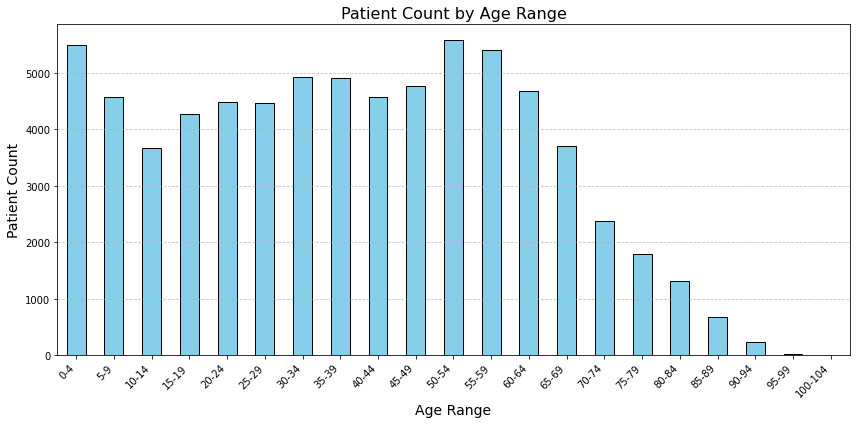

In [49]:
# Create 5-year age ranges
bins = range(0, df_with_dummies['age'].max() + 5, 5)  # Create bins up to the max age in steps of 5
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # Generate labels for the ranges dynamically

# Add a new column for the age ranges
df_with_dummies['age_range'] = pd.cut(df_with_dummies['age'], bins=bins, labels=labels, right=False)

# Count the number of patients in each age range
age_range_counts = df_with_dummies['age_range'].value_counts().sort_index()

# Display the table
age_range_table = pd.DataFrame({'Age Range': age_range_counts.index.astype(str), 'Patient Count': age_range_counts.values})
print(age_range_table)

# Plot the age ranges as a bar chart
plt.figure(figsize=(12, 6))
age_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Patient Count by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Patient Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid cutting off labels
plt.show()


> The first bar representing ages 0–4 remains significantly higher than the others, confirming that appointments for very young children dominate the dataset. This trend aligns with the earlier graph but is more clearly grouped here due to the 5-year bins.
>
> This visualization also highlights that working-age adults (30–44 years) have consistently high counts, reinforcing their prominent representation in the dataset. Meanwhile, older age groups show a gradual tapering as expected.
>
> The 5-year bins provide more granularity compared to the single-year chart, making it easier to spot trends without the noise of year-to-year fluctuations. This grouping reveals smoother transitions between adjacent age ranges and suggests that the general trends—such as high representation among children and a drop-off in elderly patients—are consistent regardless of bin size.
>
> Further analysis could explore how this distribution impacts no-show rates and whether specific 5-year age ranges have distinct attendance patterns.


In [55]:
# Put the total number of unique patients into a variable for use
total_unique_patients = cleaned_df['patient_id'].nunique()

# Calculate unique patients for each neighborhood
unique_patients_per_neighborhood = cleaned_df.groupby('neighbourhood')['patient_id'].nunique().sort_values(ascending=False)

# Sum the unique patients in the top 5 neighborhoods
top_5_total = unique_patients_per_neighborhood.head(5).sum()

# Calculate the percentage of patients from the top 5 neighborhoods
top_5_percentage = (top_5_total / total_unique_patients) * 100

# Get the names of the top 5 neighborhoods
top_5_neighborhoods = unique_patients_per_neighborhood.head(5).index.tolist()

# Print the results
print(f"{top_5_percentage:.2f}% of people come from the top 5 neighborhoods.")
print(f"The top 5 neighborhoods are: {', '.join(top_5_neighborhoods)}")


23.54% of people come from the top 5 neighborhoods.
The top 5 neighborhoods are: JARDIM CAMBURI, MARIA ORTIZ, JARDIM DA PENHA, RESISTÊNCIA, ITARARÉ


#### Here's what I can see from the data so far:
* Sixty five percent of patients were female, with almost a quarter of the patients coming from mostly five neighborhoods: Jardim Camburi, Maria Ortiz, Jardim da Penha, Resiste'ncia and Itarare. 
* There are 110,527 rows of records, and the same amount of unique appointment IDs, with 62,299 unique patient IDs.
* The eldest person in this dataset is 115 years old, and the youngest, 0 (meaning less than 1 year of age), with a median age of 37. The eldest persons may be outliers, and that may have to be taken into account with any mean calculations.
* A standard deviation of 23 means that most data points deviate by about 23 units from the mean on average, so 95% of patients are within two standard deviations of the mean, or simply put, 95% of patients are between the ages of 9 and 83.
* The number of elderly patients attending appointments drastically drops after age 70.
* Eighty one unique neighborhoods are represented in this dataset, with Jardim Camburi having the largest representation with over half of residents there.
* Despite the concentration in a few neighborhoods, attendance is fairly consistent across multiple regions.
* Nearly eight out of ten people show up for their appointments. 

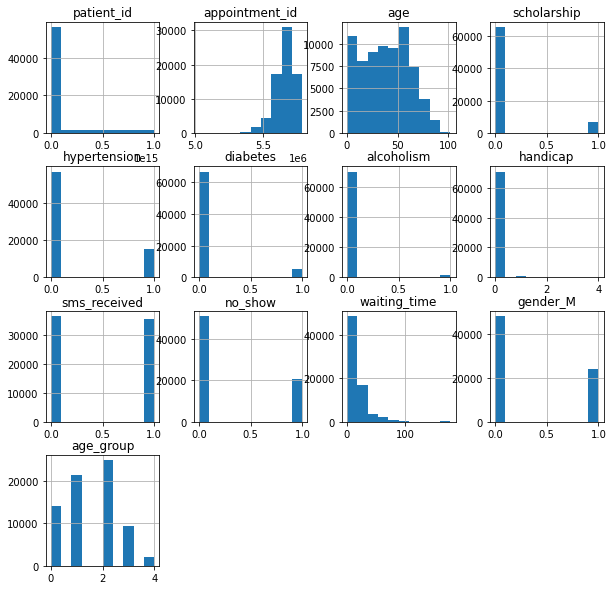

In [51]:
cleaned_df.hist(figsize=(10,10));

Taking a last look at distributions over the different column values, we see these histograms provide an overview of the distribution of key variables in the dataset. 
* Most patients showed up for their appointments. 
* A large portion of patients did not receive SMS notifications but still showed up.
* Patients in younger age groups (especially children) and adults in the 40–60 age range are more frequent.
* The handicap and scholarship distributions are imbalanced, meaning they could potentially have low impact in modeling unless weighted accordingly.

The age variable shows a high concentration of patients in the younger age groups, with a steady decline as age increases. For categorical variables such as scholarship, hypertension, diabetes, alcoholism, and sms_received, the data is heavily skewed, with the majority of binary values being 0 (indicating absence of the condition or feature). The handicap variable reveals that most patients have a handicap value of 0, with progressively fewer patients having higher handicap levels. We see the scheduled_day and appointment_day histograms indicate the dataset is time-bounded, focusing on a specific period in 2016. 

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 5 - How does the no_show rate vary across neighborhoods?  <a class="anchor" id="udacity_page_5"></a>

We explored neighborhood-level patterns by calculating and visualizing no-show rates for all neighborhoods.

__Findings:__
Highest No-show Rates:
* Ilha do Príncipe: 53%
* Parque Industrial: 43%<br>

These neighborhoods exhibit significantly higher no-show rates compared to the dataset average (20%).

Lowest No-show Rates:
* Enseada do Suá: 11.5%<br>
* Santa Cecília: 13.2%<br>

These neighborhoods show exemplary adherence, with no-show rates significantly below average.

These disparities highlight the potential role of localized factors (e.g., socioeconomic conditions, accessibility of healthcare facilities) in influencing no-show rates.

Neighborhood-based interventions, such as targeted SMS campaigns or transportation support, may help address high no-show rates in neighborhoods like Ilha do Príncipe and Parque Industrial. Further investigation into socioeconomic and logistical barriers in these areas is recommended.

[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">


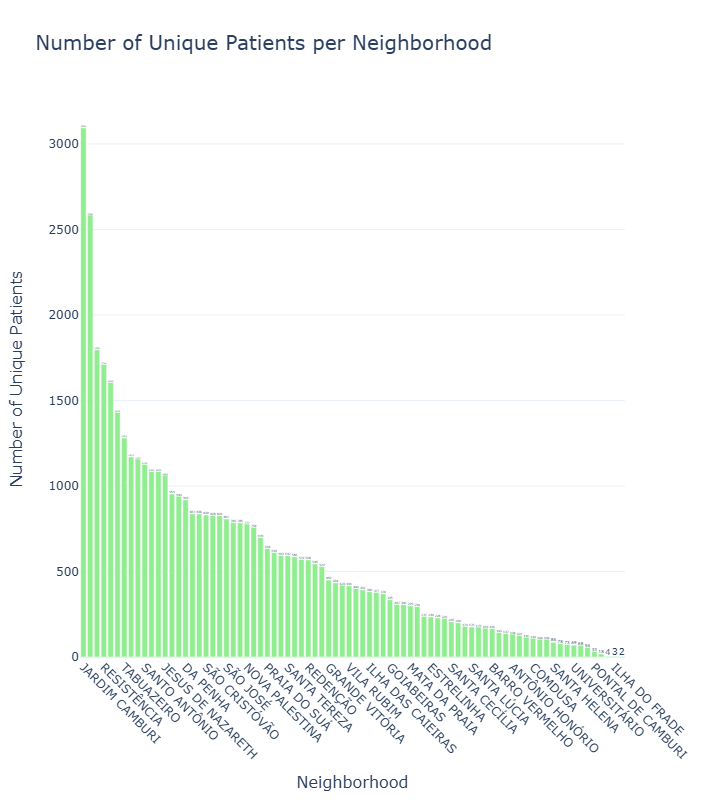

In [56]:
import plotly.express as px

# Group by 'neighbourhood' and count unique 'patient_id'
unique_patients_per_neighborhood = (
    cleaned_df.groupby('neighbourhood')['patient_id'].nunique().sort_values(ascending=False)
).reset_index()

# Rename columns for better readability
unique_patients_per_neighborhood.columns = ['Neighborhood', 'Unique Patients']

# Create an interactive Plotly bar chart
fig = px.bar(
    unique_patients_per_neighborhood,
    x='Neighborhood',
    y='Unique Patients',
    title='Number of Unique Patients per Neighborhood',
    labels={'Neighborhood': 'Neighborhood', 'Unique Patients': 'Number of Unique Patients'},
    text='Unique Patients'
)

# Customize layout
fig.update_traces(textposition='outside', marker_color='lightgreen')
fig.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    template='plotly_white',
    height=800,  # Adjust height
    width=1200   # Adjust width
)

# Show the figure
fig.show()


> Hover your mouse over a bar in this interactive chart which shows the number of individual patients in each neighborhood. Further study could be shown as to what proportion of residents are patients. In other words, larger towns may have a higher number of patients than smaller towns simply because there are more people. If ratios were put together for each town, those with the highest proportion of residents seeking medical care could be further studied. 

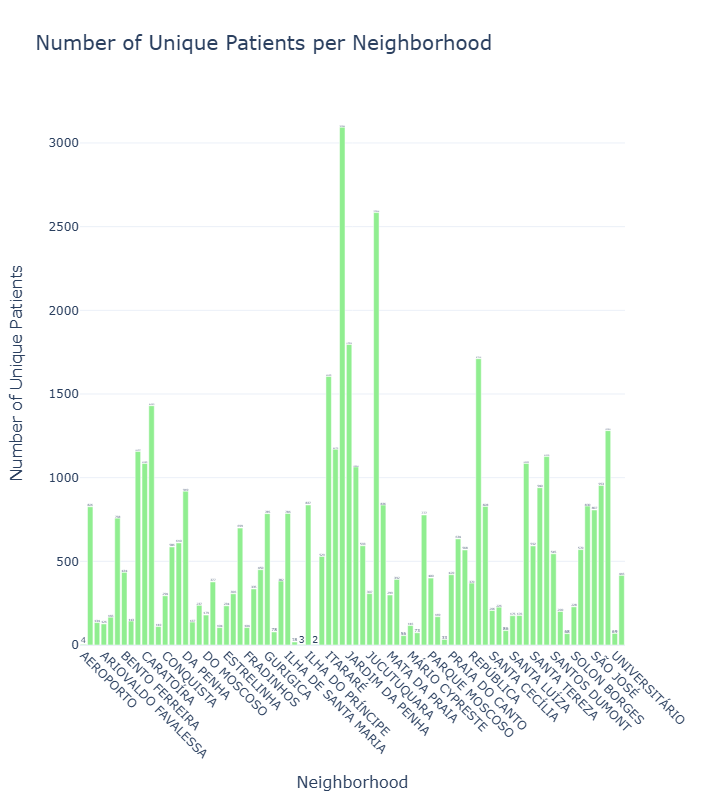

In [57]:
# Prepare data: Calculate unique patients, average age, and no_show rate for each neighborhood to be shown in tooltip
import plotly.express as px

# Prepare data: Calculate unique patients, average age, and no_show rate for each neighborhood to be shown in tooltip
neighborhood_stats = cleaned_df.groupby('neighbourhood').agg(
    unique_patients=('patient_id', 'nunique'),
    avg_age=('age', 'mean'),
    no_show_rate=('no_show', lambda x: (x == 1).mean() * 100)  # Convert to numeric where 1 = "Did Not Show"
).reset_index()

# Rename some columns for better readability
neighborhood_stats.columns = ['Neighborhood', 'Unique Patients', 'Average Age', 'No-show Rate (%)']

# Create a Plotly bar chart with enhanced tooltip
fig = px.bar(
    neighborhood_stats,
    x='Neighborhood',
    y='Unique Patients',
    title='Number of Unique Patients per Neighborhood',
    labels={'Neighborhood': 'Neighborhood', 'Unique Patients': 'Number of Unique Patients'},
    text='Unique Patients',  # Display values on the bars
    hover_data={'Average Age': ':.1f', 'No-show Rate (%)': ':.1f'}  # Format additional tooltip data
)

# Customize layout of bar graph
fig.update_traces(textposition='outside', marker_color='lightgreen')
fig.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    template='plotly_white',
    height=800,
    width=1200
)

# Show the figure
fig.show()


> Hover your mouse over this interactive chart to see the average age and rate of no_shows in addition to the number of patients each neighborhood is reporting. Remember, the average age for the entire dataset is 37 years of age. 

> The data shows that these neighborhoods have exceptionally low no_show rates, with Enseada do Suá having one of the lowest (~11.5%), followed by other neighborhoods such as Santa Cecília. This suggests these areas could serve as a model for improving appointment adherence in higher no_show areas. 

In [58]:
# Dropping the age Range column from this copy of dataset
if 'age_range' in df_with_dummies.columns:
    df_with_dummies = df_with_dummies.drop(columns=['age_range'])


In [90]:
bins = [0, 3, 7, 14, 30, 100]
labels = ['Very Short', 'Short', 'Moderate', 'Long', 'Very Long']
df_with_dummies['waiting_time_binned'] = pd.cut(df_with_dummies['waiting_time'], bins=bins, labels=labels)
print(df_with_dummies['waiting_time_binned'].unique())  # Check if all bins are created.


[NaN, 'Very Short', 'Short', 'Moderate']
Categories (5, object): ['Very Short' < 'Short' < 'Moderate' < 'Long' < 'Very Long']


In [91]:
df_with_dummies = pd.get_dummies(df_with_dummies, columns=['waiting_time_binned'], drop_first=True)
print(df_with_dummies.columns.to_list())  # Confirm the presence of dummy columns.


['patient_id', 'appointment_id', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show', 'waiting_time', 'gender_M', 'age_group', 'neighbourhood_ANDORINHAS', 'neighbourhood_ANTÔNIO HONÓRIO', 'neighbourhood_ARIOVALDO FAVALESSA', 'neighbourhood_BARRO VERMELHO', 'neighbourhood_BELA VISTA', 'neighbourhood_BENTO FERREIRA', 'neighbourhood_BOA VISTA', 'neighbourhood_BONFIM', 'neighbourhood_CARATOÍRA', 'neighbourhood_CENTRO', 'neighbourhood_COMDUSA', 'neighbourhood_CONQUISTA', 'neighbourhood_CONSOLAÇÃO', 'neighbourhood_CRUZAMENTO', 'neighbourhood_DA PENHA', 'neighbourhood_DE LOURDES', 'neighbourhood_DO CABRAL', 'neighbourhood_DO MOSCOSO', 'neighbourhood_DO QUADRO', 'neighbourhood_ENSEADA DO SUÁ', 'neighbourhood_ESTRELINHA', 'neighbourhood_FONTE GRANDE', 'neighbourhood_FORTE SÃO JOÃO', 'neighbourhood_FRADINHOS', 'neighbourhood_GOIABEIRAS', 'neighbourhood_GRANDE VITÓRIA', 'neighbourhood_GURIGICA', 'neighbourhood_HORTO', 'neighbourhood_ILHA DAS CAIEI

In [93]:
#save to csv for regression 
df_with_dummies.to_csv("dummy_encoded_dataset.csv", index=False)


<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 6 - StandardScaler <a class="anchor" id="udacity_page_6"></a>
# Additional preprocessing to boost accuracy of the model

[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

In [94]:
df_encoded_copy = pd.read_csv('dummy_encoded_dataset.csv')

In [95]:
scaler = StandardScaler()
numeric_cols = ['waiting_time', 'age']  # Columns to scale
df_encoded_copy[numeric_cols] = scaler.fit_transform(df_encoded_copy[numeric_cols])

In [96]:
#drop low-variance features (< 1% variance)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # Keep only features with >1% variance
numeric_cols_only = df_encoded_copy.select_dtypes(include=['float64', 'int64'])  # Only numerical columns for selection
selected_features = selector.fit_transform(numeric_cols_only)
selected_columns = numeric_cols_only.columns[selector.get_support(indices=True)]

In [97]:
df_encoded_copy = pd.DataFrame(selected_features, columns=selected_columns)

In [98]:
#drop dummy columns that represent <1% of the data
sparse_cols = df_encoded_copy.columns[(df_encoded_copy.sum() / len(df_encoded_copy)) < 0.01]
df_encoded_copy = df_encoded_copy.drop(columns=sparse_cols)

In [99]:
# drop 'patient_id', 'appointment_id', and 'days_until_appointment'
columns_to_drop = ['patient_id', 'appointment_id', 'days_until_appointment']
df_encoded_copy = df_encoded_copy.drop(columns=[col for col in columns_to_drop if col in df_encoded_copy.columns], errors='ignore')

In [100]:
#final check to make sure it's ready to fit
df_encoded_copy.to_csv('dummy_encoded_dataset.csv', index=False)


In [104]:
data = pd.read_csv('dummy_encoded_dataset.csv')
data.head()

scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  \
0          0.0           1.0       0.0         0.0       0.0           0.0   
1          0.0           0.0       0.0         0.0       0.0           0.0   
2          0.0           0.0       0.0         0.0       0.0           0.0   
3          0.0           0.0       0.0         0.0       0.0           0.0   
4          0.0           0.0       0.0         0.0       0.0           0.0   

   no_show  gender_M  neighbourhood_ANDORINHAS  neighbourhood_BELA VISTA  ...  \
0      0.0       0.0                       0.0                       0.0  ...   
1      1.0       0.0                       0.0                       0.0  ...   
2      1.0       0.0                       0.0                       0.0  ...   
3      0.0       0.0                       0.0                       0.0  ...   
4      0.0       0.0                       0.0                       0.0  ...   

   neighbourhood_SANTA TEREZA  neighbourhood_SANTO ANDRÉ  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   neighbourhood_SANTO ANTÔNIO  neighbourhood_SANTOS DUMONT  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   neighbourhood_SÃO BENEDITO  neighbourhood_SÃO CRISTÓVÃO  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   neighbourhood_SÃO JOSÉ  neighbourhood_SÃO PEDRO  neighbourhood_TABUAZEIRO  \
0                     0.0                      0.0                       0.0   
1                     0.0                      0.0                       0.0   
2                     0.0                      0.0                       0.0   
3                     0.0                      0.0                       0.0   
4                     0.0                      0.0                       0.0   

   days_since_scheduled  
0                 169.0  
1                 169.0  
2                 169.0  
3                 169.0  
4                 169.0  

[5 rows x 45 columns]

In [105]:
# Check for NaN values
print("Number of missing values:\n")
print(data.isnull().sum().sum())  # Should print 0 if clean


Number of missing values:

0


In [106]:
# Check data types
print(data.dtypes.value_counts())

# Specifically check for non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")  # Should be empty if ready


float64    45
Name: count, dtype: int64
Non-numeric columns: []


In [107]:
# Check unique values in the target column
print("Target column values:\n")
print(data['no_show'].value_counts())


Target column values:

no_show
0.0    51436
1.0    20519
Name: count, dtype: int64


In [108]:
# Check shape
print(f"Dataset shape: {data.shape}")

# Confirm it has reasonable number of rows/columns after dummy encoding


Dataset shape: (71955, 45)


In [109]:
# Check summary statistics for scaled columns
print(data.describe().T)


                                     count        mean        std  min    25%  \
scholarship                        71955.0    0.092711   0.290029  0.0    0.0   
hypertension                       71955.0    0.208894   0.406522  0.0    0.0   
diabetes                           71955.0    0.074727   0.262953  0.0    0.0   
alcoholism                         71955.0    0.025321   0.157100  0.0    0.0   
handicap                           71955.0    0.019985   0.153946  0.0    0.0   
sms_received                       71955.0    0.493100   0.499956  0.0    0.0   
no_show                            71955.0    0.285164   0.451496  0.0    0.0   
gender_M                           71955.0    0.331999   0.470934  0.0    0.0   
neighbourhood_ANDORINHAS           71955.0    0.021138   0.143846  0.0    0.0   
neighbourhood_BELA VISTA           71955.0    0.015468   0.123406  0.0    0.0   
neighbourhood_BONFIM               71955.0    0.023737   0.152230  0.0    0.0   
neighbourhood_CARATOÍRA     

In [ ]:
#testing different n_estimators, 

In [78]:
df_copy = pd.read_csv('dummy_encoded_dataset.csv')

In [79]:
# Split data into features (X) and target (y)
X = df_copy.drop(columns=['no_show'])  # Features
y = df_copy['no_show']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Initialize dictionary to store accuracy scores for different n_estimators
ac_dev_gbc = {}

# Loop through different values of n_estimators
for i in range(200, 2000, 400):  # Testing n_estimators from 200 to 2000 with step size of 200
    params = {
        'n_estimators': i,
        'max_depth': 4,
        'min_samples_split': 2,
        'learning_rate': 0.05,
        'loss': 'log_loss',  # Equivalent to logistic regression for classification
        'random_state': 101
    }
    gbc = GradientBoostingClassifier(**params)
    
    # Fit the model
    gbc.fit(X_train, y_train)
    
    # Predict on the test set
    gbc_predictions = gbc.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, gbc_predictions)
    ac_dev_gbc[i] = accuracy  # Store accuracy for the current n_estimators


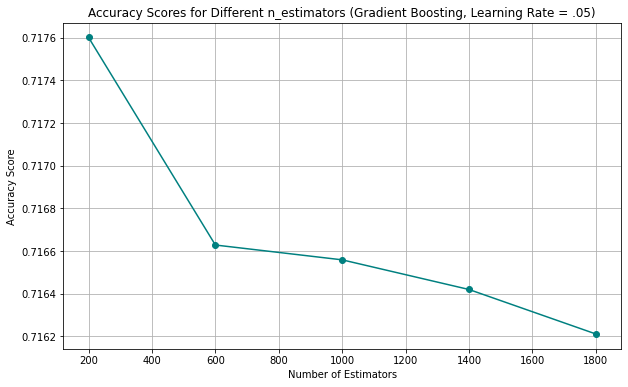

In [82]:
# Plot the accuracy scores for different n_estimators
plt.figure(figsize=(10, 6))
plt.plot(ac_dev_gbc.keys(), ac_dev_gbc.values(), marker='o', linestyle='-', color='teal')
plt.title(f"Accuracy Scores for Different n_estimators (Gradient Boosting, Learning Rate = .05)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.show()

Given the number of estimators when run with 0.01 learning rate and a step rate of 200 is no different than what we discovered in model_tuning.py, I will suspend investigation here. 

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 8 - Additional Graphs <a class="anchor" id="udacity_page_8"></a>



[Back to Top](#udacity_toc)
<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

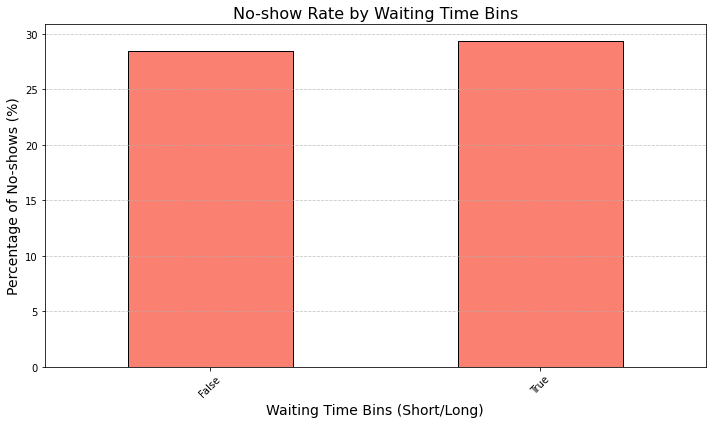

In [83]:
# Group data by waiting_time_binned and calculate no-show rates
no_show_by_waiting_time = df_with_dummies.groupby('waiting_time_binned_Short')['no_show'].value_counts(normalize=True).unstack() * 100
no_show_by_waiting_time.columns = ['Showed Up', 'No-show']

# Plot no-show rates by waiting time bins
plt.figure(figsize=(10, 6))
no_show_by_waiting_time['No-show'].plot(kind='bar', color='salmon', edgecolor='black')
plt.title('No-show Rate by Waiting Time Bins', fontsize=16)
plt.xlabel('Waiting Time Bins (Short/Long)', fontsize=14)
plt.ylabel('Percentage of No-shows (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


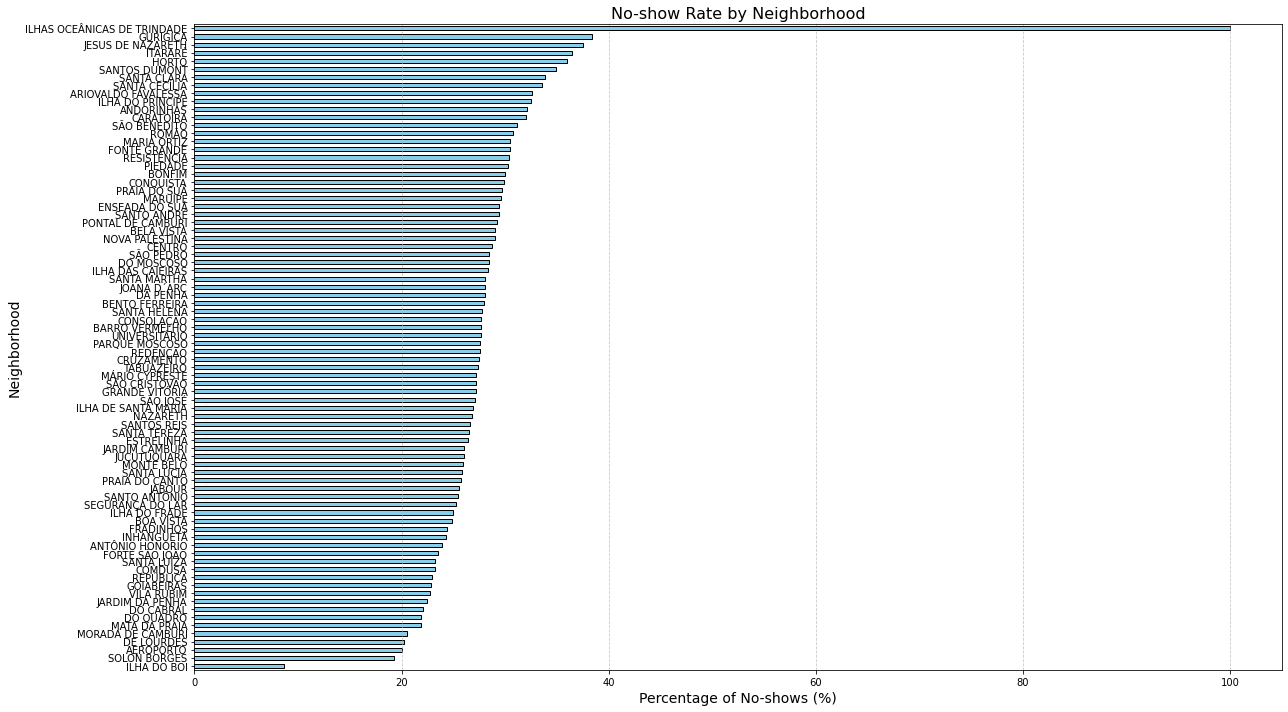

In [84]:
# Group data by neighborhood and calculate no-show rates
no_show_by_neighborhood = cleaned_df.groupby('neighbourhood')['no_show'].value_counts(normalize=True).unstack() * 100
no_show_by_neighborhood.columns = ['Showed Up', 'No-show']

# Plot no-show rates by neighborhood
plt.figure(figsize=(18, 10))
no_show_by_neighborhood['No-show'].sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('No-show Rate by Neighborhood', fontsize=16)
plt.xlabel('Percentage of No-shows (%)', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


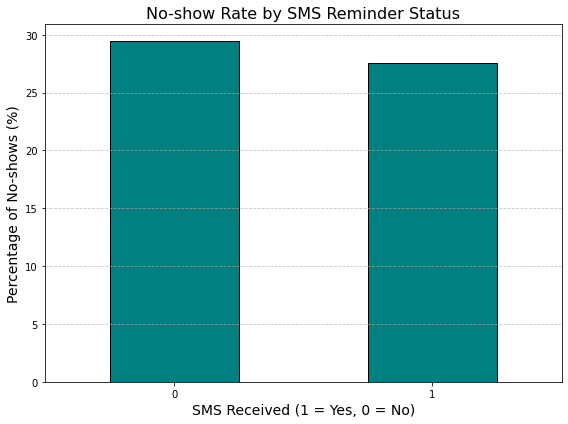

In [85]:
# Group data by SMS reminders and calculate no-show rates
sms_no_show = df_with_dummies.groupby('sms_received')['no_show'].value_counts(normalize=True).unstack() * 100
sms_no_show.columns = ['Showed Up', 'No-show']

# Plot no-show rates by SMS received
plt.figure(figsize=(8, 6))
sms_no_show['No-show'].plot(kind='bar', color='teal', edgecolor='black')
plt.title('No-show Rate by SMS Reminder Status', fontsize=16)
plt.xlabel('SMS Received (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Percentage of No-shows (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

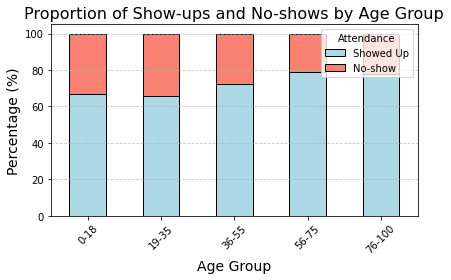

In [86]:
# Group data by age group and calculate no-show rates
no_show_by_age_group = df_with_dummies.groupby('age_group')['no_show'].value_counts(normalize=True).unstack() * 100
no_show_by_age_group.columns = ['Showed Up', 'No-show']

# Plot no-show rates by age group
plt.figure(figsize=(10, 6))
no_show_by_age_group.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], edgecolor='black')
plt.title('Proportion of Show-ups and No-shows by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Attendance', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();


In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Marcy_Misner_healthcare_Dataset.ipynb